In [4]:
import pandas as pd

file_path = r"C:\Users\Ayush\Downloads\jumbo_company_attach_data.xls"

df = pd.read_excel(file_path)

df.head()


,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


In [5]:
df_long = df.melt(
    id_vars=["Branch", "Store_Name"],
    value_vars=["Aug", "Sep", "Oct", "Nov", "Dec"],
    var_name="Month",
    value_name="Attach_Percent"
)

df_long.head()


,Branch,Store_Name,Month,Attach_Percent
0,Delhi_Ncr,Delhi(Janakpuri) Br,Aug,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,Aug,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,Aug,0.43
3,Pune,Pune(Bhosari) Br,Aug,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,Aug,0.17


EDA

In [6]:
df_long.groupby("Month")["Attach_Percent"].mean().sort_index()


Month
Aug    0.128589
Dec    0.217239
Nov    0.217117
Oct    0.170920
Sep    0.167301
Name: Attach_Percent, dtype: float64

In [7]:
df_long.groupby("Branch")["Attach_Percent"].mean().sort_values(ascending=False)


Branch
Pune         0.276500
Delhi_Ncr    0.243682
Mumbai       0.173474
Thane        0.148600
Gujarat      0.134583
Telangana    0.118350
Name: Attach_Percent, dtype: float64

In [8]:
store_perf = df_long.groupby("Store_Name")["Attach_Percent"].mean().sort_values(ascending=False)
store_perf.head(5)


Store_Name
Delhi(Hauz Khas)     0.622
Pune(Hadapsar)       0.586
Pune(Kondhawa)       0.414
Delhi(Budh Vihar)    0.390
Delhi(Daryaganj)     0.386
Name: Attach_Percent, dtype: float64

In [9]:
store_perf.tail(5)


Store_Name
Currey Road                         0.0
Vadodara(Kothi Road)                0.0
Ap(Tirupathi-Leela Mahal Circle)    0.0
Ap(Ntr Circle)                      0.0
MAHIM(VS Next)                      0.0
Name: Attach_Percent, dtype: float64

Store Categorization

In [10]:
import pandas as pd

store_avg = (
    df_long.groupby(["Branch", "Store_Name"])["Attach_Percent"]
    .mean()
    .reset_index()
)

store_avg["Performance_Category"] = pd.qcut(
    store_avg["Attach_Percent"],
    q=3,
    labels=["Low", "Medium", "High"]
)

store_avg.head()


,Branch,Store_Name,Attach_Percent,Performance_Category
0,Delhi_Ncr,DELHI(ASHOK VIHAR),0.064,Low
1,Delhi_Ncr,DELHI(KRISHNA NAGAR),0.170,Medium
2,Delhi_Ncr,DELHI(ROHINI Sector-16),0.070,Low
3,Delhi_Ncr,Delhi(Budh Vihar),0.390,High
4,Delhi_Ncr,Delhi(Burari),0.334,High


In [11]:
store_avg["Performance_Category"].value_counts()


Performance_Category
Medium    55
Low       54
High      54
Name: count, dtype: int64

In [12]:
jan_prediction = (
    df_long[df_long["Month"].isin(["Oct", "Nov", "Dec"])]
    .groupby(["Branch", "Store_Name"])["Attach_Percent"]
    .mean()
    .reset_index()
    .rename(columns={"Attach_Percent": "Predicted_Jan_Attach"})
)

jan_prediction.head()


,Branch,Store_Name,Predicted_Jan_Attach
0,Delhi_Ncr,DELHI(ASHOK VIHAR),0.106667
1,Delhi_Ncr,DELHI(KRISHNA NAGAR),0.200000
2,Delhi_Ncr,DELHI(ROHINI Sector-16),0.116667
3,Delhi_Ncr,Delhi(Budh Vihar),0.446667
4,Delhi_Ncr,Delhi(Burari),0.363333


In [13]:
jan_prediction.describe()


,Predicted_Jan_Attach
count,163.000000
mean,0.201759
std,0.116731
min,0.000000
25%,0.123333
50%,0.183333
75%,0.271667
max,0.613333


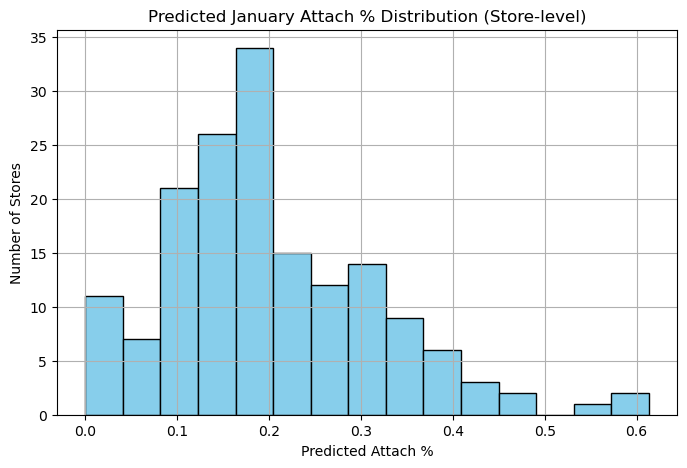

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(jan_prediction["Predicted_Jan_Attach"], bins=15, color='skyblue', edgecolor='black')
plt.title("Predicted January Attach % Distribution (Store-level)")
plt.xlabel("Predicted Attach %")
plt.ylabel("Number of Stores")
plt.grid(True)
plt.show()


In [15]:
import matplotlib.pyplot as plt

# Ensure months are in order
month_order = ["Aug", "Sep", "Oct", "Nov", "Dec"]

monthly_avg = (
    df_long.groupby("Month")["Attach_Percent"]
    .mean()
    .reindex(month_order)  # ensures Aug → Dec order
)


In [17]:
plt.savefig("monthly_attach_trend.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

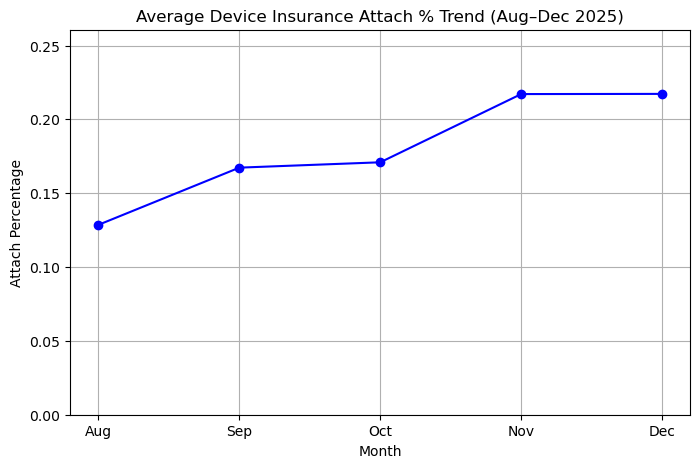

In [20]:
import matplotlib.pyplot as plt

# Ensure months are in order
month_order = ["Aug", "Sep", "Oct", "Nov", "Dec"]

monthly_avg = (
    df_long.groupby("Month")["Attach_Percent"]
    .mean()
    .reindex(month_order)
)

# Create figure and plot
plt.figure(figsize=(8,5))
plt.plot(month_order, monthly_avg, marker='o', linestyle='-', color='blue')
plt.title("Average Device Insurance Attach % Trend (Aug–Dec 2025)")
plt.xlabel("Month")
plt.ylabel("Attach Percentage")
plt.ylim(0, max(monthly_avg)*1.2)
plt.grid(True)

# Save the figure **after plotting**
plt.savefig("monthly_attach_trend.png", dpi=300, bbox_inches='tight')  # Saves in current working directory
plt.show()


In [21]:
import os
print(os.getcwd())


C:\Users\Ayush\Zopper_Attach_Rate_Analysis.ipynb


In [24]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN

# ------------------------------
# 2️⃣ Load Excel File
# ------------------------------
file_path = r"C:\Users\Ayush\Downloads\jumbo_company_attach_data.xls" # Update if needed
df = pd.read_excel(file_path)

# ------------------------------
# 3️⃣ Convert to Long Format
# ------------------------------
df_long = df.melt(
    id_vars=["Branch", "Store_Name"], 
    value_vars=["Aug","Sep","Oct","Nov","Dec"], 
    var_name="Month", 
    value_name="Attach_Percent"
)

# ------------------------------
# 4️⃣ Generate Charts
# ------------------------------

# Month-wise trend
month_order = ["Aug","Sep","Oct","Nov","Dec"]
monthly_avg = df_long.groupby("Month")["Attach_Percent"].mean().reindex(month_order)
plt.figure(figsize=(8,5))
plt.plot(month_order, monthly_avg, marker='o', linestyle='-', color='blue')
plt.title("Average Device Insurance Attach % Trend (Aug–Dec 2025)")
plt.xlabel("Month")
plt.ylabel("Attach Percentage")
plt.grid(True)
plt.savefig(r"C:\Users\Ayush\monthly_attach_trend.png", dpi=300, bbox_inches='tight')
plt.close()

# Branch-wise average
branch_avg = df_long.groupby("Branch")["Attach_Percent"].mean().sort_values(ascending=False)
branch_avg.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.title("Average Attach % by Branch")
plt.ylabel("Attach %")
plt.grid(True)
plt.savefig(r"C:\Users\Ayush\branch_avg_attach.png", dpi=300, bbox_inches='tight')
plt.close()

# Store performance categories
store_avg = df_long.groupby(["Branch","Store_Name"])["Attach_Percent"].mean().reset_index()
store_avg["Performance_Category"] = pd.qcut(store_avg["Attach_Percent"], q=3, labels=["Low","Medium","High"])
store_avg["Performance_Category"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6),
                                                     colors=['red','orange','green'])
plt.title("Store Performance Categories")
plt.savefig(r"C:\Users\Ayush\store_category.png", dpi=300, bbox_inches='tight')
plt.close()

# Predicted January attach % (average of Oct-Dec)
jan_prediction = df_long[df_long["Month"].isin(["Oct","Nov","Dec"])].groupby(["Branch","Store_Name"])["Attach_Percent"].mean().reset_index()
jan_prediction.rename(columns={"Attach_Percent":"Predicted_Jan_Attach"}, inplace=True)
plt.figure(figsize=(8,5))
plt.hist(jan_prediction["Predicted_Jan_Attach"], bins=15, color='skyblue', edgecolor='black')
plt.title("Predicted January Attach % Distribution")
plt.xlabel("Predicted Attach %")
plt.ylabel("Number of Stores")
plt.grid(True)
plt.savefig(r"C:\Users\Ayush\predicted_jan.png", dpi=300, bbox_inches='tight')
plt.close()

# ------------------------------
# 5️⃣ Create PowerPoint
# ------------------------------
prs = Presentation()
prs.slide_width = Inches(13.33)
prs.slide_height = Inches(7.5)

def add_slide(title, content=None, img_path=None):
    slide_layout = prs.slide_layouts[5]  # Blank layout
    slide = prs.slides.add_slide(slide_layout)
    
    # Title
    title_box = slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(12), Inches(1))
    title_tf = title_box.text_frame
    title_tf.text = title
    title_tf.paragraphs[0].font.size = Pt(32)
    
    # Content
    if content:
        content_box = slide.shapes.add_textbox(Inches(0.5), Inches(1.2), Inches(12), Inches(5))
        content_tf = content_box.text_frame
        for line in content:
            p = content_tf.add_paragraph()
            p.text = line
            p.font.size = Pt(24)
            p.alignment = PP_ALIGN.LEFT

    # Image
    if img_path:
        slide.shapes.add_picture(img_path, Inches(3), Inches(2), width=Inches(7))

# ------------------------------
# 6️⃣ Add Slides with Content
# ------------------------------
# Slide 1: Executive Summary
add_slide("Executive Summary", content=[
    "Analysis of device insurance attach % across stores (Aug–Dec 2025).",
    "Objective: Identify trends, benchmark stores and branches, categorize performance levels,",
    "and predict January 2026 attach percentages for actionable insights."
])

# Slide 2: Month-wise Trend
add_slide("Month-wise Trend", img_path=r"C:\Users\Ayush\monthly_attach_trend.png", content=[
    "Steady increase from Aug (12.86%) → Dec (21.72%).",
    "Sharp increase during festive months (Nov–Dec).",
    "Indicates higher customer adoption of insurance plans."
])

# Slide 3: Branch-wise Performance
add_slide("Branch-wise Performance", img_path=r"C:\Users\Ayush\branch_avg_attach.png", content=[
    "Top branches: Pune (27.65%), Delhi_NCR (24.37%).",
    "Low branches: Telangana (11.8%), Gujarat (13.46%).",
    "Focus on replicating best practices and targeted interventions."
])

# Slide 4: Store Categorization
add_slide("Store Categorization", img_path=r"C:\Users\Ayush\store_category.png", content=[
    "Stores categorized as High, Medium, Low performers.",
    "High → replicate practices.",
    "Medium → coaching opportunities.",
    "Low → immediate intervention required."
])

# Slide 5: Predicted January Attach %
add_slide("Predicted January Attach %", img_path=r"C:\Users\Ayush\predicted_jan.png", content=[
    "Average predicted attach %: 20.18%",
    "Min: 0%, Max: 61.33%",
    "High-performing stores maintain leadership; low-performing stores need attention."
])

# Slide 6: Recommendations
add_slide("Recommendations", content=[
    "1. Replicate best practices from top-performing stores.",
    "2. Conduct targeted training & awareness campaigns at low-performing stores.",
    "3. Offer incentives during festive months to maximize attach %.",
    "4. Monitor January attach % to validate predictions and adjust strategy."
])

# ------------------------------
# 7️⃣ Save PPT
# ------------------------------
prs.save(r"C:\Users\Ayush\Device_Insurance_Analysis_Report.pptx")
print("Presentation saved as 'Device_Insurance_Analysis_Report.pptx' in C:\\Users\\Ayush")


Presentation saved as 'Device_Insurance_Analysis_Report.pptx' in C:\Users\Ayush
